In [1]:
from scipy.io import loadmat

In [2]:
mat = loadmat('FP/TYRN/TYRN20180611rec1-180611-170409.mat')
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Jun 14 16:09:43 2018',
 '__version__': '1.0',
 '__globals__': [],
 'Ca': array([[  5.075289 ,   4.5626283,   4.07922  , ..., 831.1491   ,
         831.7258   , 832.32465  ]], dtype=float32),
 'input': array([[0.00232865, 0.00829899, 0.01387493, ..., 0.00191727, 0.00186007,
         0.00179347]], dtype=float32)}

In [6]:
import numpy as np
laser = np.squeeze(mat['input'])

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

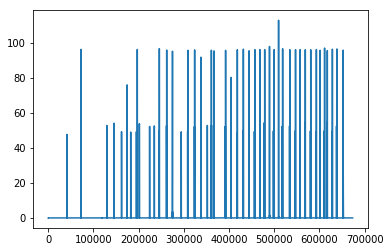

In [9]:
plt.plot(laser)

In [10]:
len(laser), mat['Ca'].shape

(673639, (1, 673639))

In [11]:
timestamps = list(range(len(laser)))

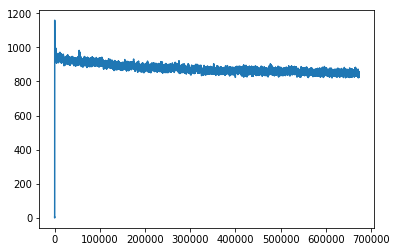

In [12]:
highline = np.squeeze(mat['Ca'])
plt.plot(timestamps, highline)

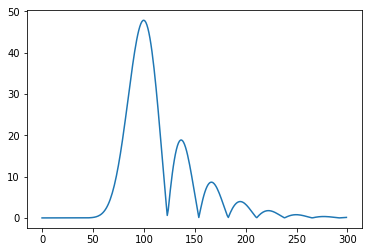

In [13]:
region = laser[71500:73000][500:800]
plt.plot(region)

In [14]:
def derrivative(x):
    l = [0]
    for i in range(1, len(x)):
        l.append(x[i] - x[i-1])
    return l

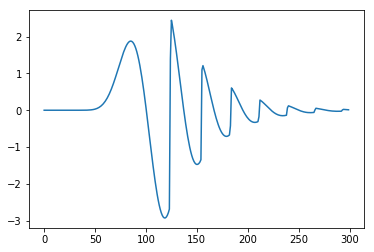

In [15]:
plt.plot(derrivative(region))

In [16]:
def find_peaks(l, threshold):
    is_peak = False
    peaks = []
    for i, v in enumerate(l):
        if not is_peak:
            if v > threshold:
                peaks.append(i)
                is_peak = True
        else:
            if v < 10:
                is_peak = False
    return find_troughs(l, peaks)

def find_troughs(l, peaks):
    troughs = []
    for i in peaks:
        while l[i] > l[i-1]:
            i -= 1
        troughs.append(i)
    return troughs

p_50 = find_peaks(laser, 40)
p_100 = find_peaks(laser, 90)

p_50 = sorted(list(set(p_50) - set(p_100)))

In [17]:
len(p_50), len(p_100)

(46, 33)

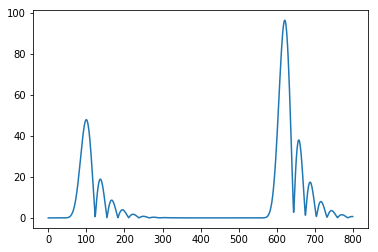

In [18]:
plt.plot(laser[72000:72800])

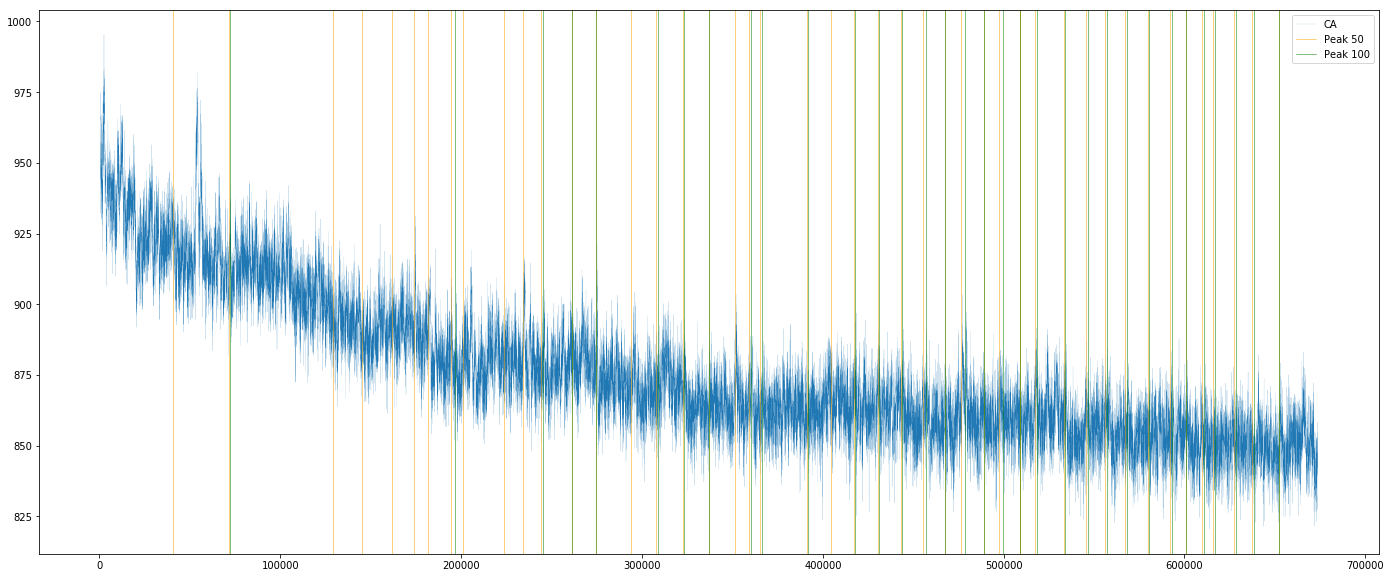

In [19]:
plt.figure(figsize=(24,10))
offset = 400
p1, = plt.plot(timestamps[offset:], highline[offset:], linewidth=0.1)
for v in p_50:
    p2 = plt.axvline(x=v-offset, color='orange', linewidth=0.5)

for v in p_100:
    p3 = plt.axvline(x=v-offset, color='green', linewidth=0.5)
plt.legend(labels=["CA", "Peak 50", "Peak 100"], handles=[p1,p2,p3])
plt.savefig("Rat_Stuff.png")